# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here



In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/han/Desktop/USD/ADS 509/ADS509-Week1/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum([len(x) for x in tokens])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: This is like using a test(s) on a function to make sure they work as intended.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data

artists = [x for x in os.listdir(os.path.join(data_location, lyrics_folder)) if 'ipynb' not in x]

lyrics = pd.DataFrame(columns=['artist', 'title', 'lyric'])

for artist in artists:
    
    path = os.path.join(data_location, lyrics_folder, artist)
    
    for file in os.listdir(path):
        
        if 'txt' not in file:
            continue
            
        song_path = os.path.join(path, file)
        
        with open(song_path, 'r') as file:
            song = file.readlines()
            
        title = song[0].replace('\n', '').strip()
        
        lyric = song[1:]
        lyric = ' '.join(lyric)
        lyric = lyric.replace('\n', '').strip()
        
        lyrics = pd.concat([lyrics, pd.DataFrame({
                                        'artist':artist,
                                        'title':title,
                                        'lyric':lyric
                                    }, index=[0])], ignore_index=True)
        
lyrics.head()

,artist,title,lyric
0,eminem,Infinite,"Aw, yeah (It's like this, like this) It's Emin..."
1,eminem,Soap (Skit),[Roger:] Skylar Montgomery? [Skylar:] What do ...
2,eminem,Paul (Skit),"Em... what's going on, it's Paul... Umm... Dre..."
3,eminem,Steve Berman (Skit),"[Door creaks open] [Background music ""What's T..."
4,eminem,Jealousy Woes II,Jealous! Jealous! Jealous! Jealous! Jealous! J...


In [7]:
# Read in the twitter data

artists = [x for x in os.listdir(os.path.join(data_location, twitter_folder)) if 'ipynb' not in x]
artists = [x for x in artists if 'follower_data' in x]

twitter = pd.DataFrame()

for artist in artists:
    
    temp = pd.read_csv(os.path.join(twitter_folder, artist), sep='\t')
    temp['artist'] = artist.replace('_follower_data.txt', '').lower()
    
    twitter = pd.concat([twitter, temp], ignore_index=True)
    
twitter.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,YanyiChen91,Annabelle,1522331221631463424,New York,0,31,"Chinese-American, bank clerk, financial adviso...",snoopdogg
1,diegoalmaguer09,Diego Almaguer,978092073466368001,NaN,5,185,Hola.,snoopdogg
2,fredtindzava,fred tindzava,1368626950349144078,NaN,22,224,why so serious 🧐,snoopdogg
3,da_madd,ADIEM.,1265613212701073408,Oued Fodda,24,178,VOLATILE.,snoopdogg
4,Jaxon4Jaxon,Levi Jaxon,1524884646881685504,NaN,3,251,₩,snoopdogg


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison
punctuation = set([x for x in punctuation if x!='#']) # Keep the hashtag for tweets. May need to remove if not necessary

In [9]:
artists = lyrics['artist'].unique().tolist()

In [10]:
def drop_punctuation(string):
    
    for p in punctuation:
        
        string = string.replace(p, '')
        
    return string

In [11]:
def clean_data(string):
    
    string = drop_punctuation(string)
    string = string.lower()
    # replace two or more space into one
    string = re.sub(r'\s{2,}', ' ', string)
    tokens = string.split(' ')
    tokens = [x for x in tokens if x not in sw]
    
    # list of words
    return tokens, len(tokens)

In [12]:
lyrics_tokens = {}

lyrics['lyric'] = lyrics['lyric'].fillna('')

for artist in artists:
    
    cleaned_data = []
    
    for i, lyric in lyrics[lyrics['artist']==artist].iterrows():
        temp, len_tokens = clean_data(lyric['lyric'])
        cleaned_data.extend(temp)
        lyrics.loc[i, 'Length'] = len_tokens
        
    cleaned_data = [x for x in cleaned_data if x] # remove any '' character
    
    lyrics_tokens[artist] = cleaned_data

In [13]:
tweets_tokens = {}

twitter['description'] = twitter['description'].fillna('')

for artist in artists:
    
    cleaned_data = []
    
    for tweet in twitter.loc[twitter['artist']==artist, 'description']:
        temp, _ = clean_data(tweet)
        cleaned_data.extend(temp)
        
    cleaned_data = [x for x in cleaned_data if x] # remove any '' character
    
    tweets_tokens[artist] = cleaned_data

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [14]:
for artist in artists:
    print(artist)
    print()
    descriptive_stats(lyrics_tokens[artist])
    print()
    descriptive_stats(tweets_tokens[artist])
    print()

eminem

There are 16156 tokens in the data.
There are 4148 unique tokens in the data.
There are 79413 characters in the data.
The lexical diversity is 0.257 in the data.

There are 64571 tokens in the data.
There are 25689 unique tokens in the data.
There are 388484 characters in the data.
The lexical diversity is 0.398 in the data.

snoopdogg

There are 16041 tokens in the data.
There are 3655 unique tokens in the data.
There are 76709 characters in the data.
The lexical diversity is 0.228 in the data.

There are 58723 tokens in the data.
There are 23509 unique tokens in the data.
There are 352330 characters in the data.
The lexical diversity is 0.400 in the data.



Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: This would result in higher number of tokens (not unique) and number of characters. And doing so will lead most of them (if not all) to show up on top 5 words as they tend to appear more than other words which is one of reasons we drop stopwords before.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My assumption was that they should quite have the similar lexcial diversity in both the tweets as well as the lyrics, especially when I chose two artists from Rapping genre. Because of this, the similarity conform to my beliefs.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [15]:
def is_emoji(s):
    return(s in emoji.UNICODE_EMOJI['en'])

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [16]:
for artist in artists:

    tweets = tweets_tokens[artist]
    emojis = [x for x in tweets if is_emoji(x)]
    emojis = pd.Series(emojis).value_counts()
    emojis = emojis.head(10)
    
    print('Top 10 Emojis used by {} in descending order'.format(artist.upper()))
    print('\t', emojis.keys().tolist())
    print()
    print()

Top 10 Emojis used by EMINEM in descending order
	 ['❤️', '💙', '✨', '🖤', '🎶', '👑', '😎', '🎮', '🐐', '💯']


Top 10 Emojis used by SNOOPDOGG in descending order
	 ['❤️', '😎', '💯', '✨', '🇺🇸', '👑', '🖤', '🏳️\u200d🌈', '🙏', '💜']




### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [17]:
for artist in artists:

    tweets = tweets_tokens[artist]
    hashtags = [x for x in tweets if x[0]=='#']
    hashtags = pd.Series(hashtags).value_counts()
    hashtags = hashtags[hashtags.keys()!='#'] # There could be just hashtag so drop this. This is caused when hashtag was used with a stopword
    hashtags = hashtags.head(10)
    
    print('Top 10 Emojis used by {} in descending order'.format(artist.upper()))
    print('\t', hashtags.keys().tolist())
    print()
    print()

Top 10 Emojis used by EMINEM in descending order
	 ['#bitcoin', '#1', '#mufc', '#crypto', '#nft', '#nfts', '#blacklivesmatter', '#blm', '#cfc', '#eth']


Top 10 Emojis used by SNOOPDOGG in descending order
	 ['#bitcoin', '#nft', '#crypto', '#nfts', '#btc', '#blm', '#blacklivesmatter', '#eth', '#bnb', '#resist']




### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [18]:
# Clean Title

for artist in artists:
    
    title_words = []
    
    for i, x in lyrics[lyrics['artist']==artist].iterrows():
        
        cleaned_title, _ = clean_data(x['title'])
        title_words.extend(cleaned_title)
        
    title_words = pd.Series(title_words).value_counts().head(5)
    
    print('Top 10 Emojis used by {} in descending order'.format(artist.upper()))
    print('\t', title_words.keys().tolist())
    print()
    print()

Top 10 Emojis used by EMINEM in descending order
	 ['skit', 'shady', 'public', 'fuck', 'murder']


Top 10 Emojis used by SNOOPDOGG in descending order
	 ['intro', 'pump', 'gz', 'tha', 'dodi']




### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


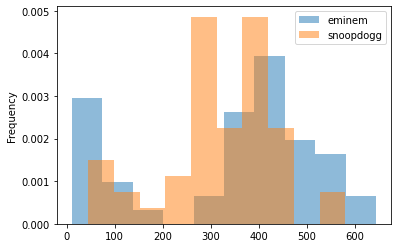

In [19]:
lyrics.groupby('artist')['Length'].plot(kind="hist",density=True,alpha=0.5,legend=True);

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: Any space that appears one or more. Same as having `'\s{1,}'`


In [20]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [22]:
# This was already applied and taken care of in the clean_data function
# Try this too anyway after applying clean_data

# Your lyric length comparison chart here. 
for artist in artists:
    for i, x in lyrics[lyrics['artist']==artist].iterrows():
        cleaned_lyric, cleaned_length = clean_data(' '.join(tokenize_lyrics(x['lyric'])))
        lyrics.loc[i, 'NewLength'] = cleaned_length

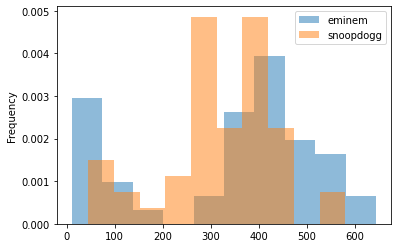

In [23]:
lyrics.groupby('artist')['NewLength'].plot(kind="hist",density=True,alpha=0.5,legend=True);

In [24]:
lyrics.head()

,artist,title,lyric,Length,NewLength
0,eminem,Infinite,"Aw, yeah (It's like this, like this) It's Emin...",390.0,390.0
1,eminem,Soap (Skit),[Roger:] Skylar Montgomery? [Skylar:] What do ...,40.0,40.0
2,eminem,Paul (Skit),"Em... what's going on, it's Paul... Umm... Dre...",12.0,12.0
3,eminem,Steve Berman (Skit),"[Door creaks open] [Background music ""What's T...",143.0,143.0
4,eminem,Jealousy Woes II,Jealous! Jealous! Jealous! Jealous! Jealous! J...,309.0,309.0


By the looks of the graph and the table, length values are same (meaning that collapse_whitespace and how I implemented clean_data are functioning the same)